## Building Linear Regression Model and Deep Neural Network with TensorFlow

#### Task: 
* The task is to create a model that can predict whether a car is `cheap` or `expensive` based on an input(s) eg car price or horse power or predict the car price when the model is fed the cars horse power

#### Data:

In [1]:
import tensorflow as tf### models
import pandas as pd ### reading and processing data
import seaborn as sns ### visualization
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


2023-06-30 18:21:31.173834: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv("Train_prediction.csv")
data.head(5)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [3]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


* 'v.id', - **will not be used**
* 'on road old' - **most data values lie between the mean and stddev**
* 'on road now'- both on road datas will not be used for modelling 
* 'years' _ 
* 'km', 
* 'rating'
* 'condition'
* 'economy'
* 'top speed'
* 'hp'- **Horse power** 
* 'torque', 
* 'current price'
    
    

In [4]:
data.shape

(1000, 12)

'years' _
'km',
'rating'
'condition'
'economy'
'top speed'
'hp'- Horse power
'torque', is **X i.e. (N, 8)**

'current price' is **Y i.e. (N, 1)**

**The task is to pass any of the X columns through the model and the model will predict and produce Y i.e current price prediction.** 

In [5]:
model_data = data[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']]
model_data.head()

,years,km,rating,condition,economy,top speed,hp,torque,current price
0,3,78945,1,2,14,177,73,123,351318.0
1,6,117220,5,9,9,148,74,95,285001.5
2,2,132538,2,8,15,181,53,97,215386.0
3,4,101065,4,3,11,197,54,116,244295.5
4,6,61559,3,9,12,160,53,105,531114.5


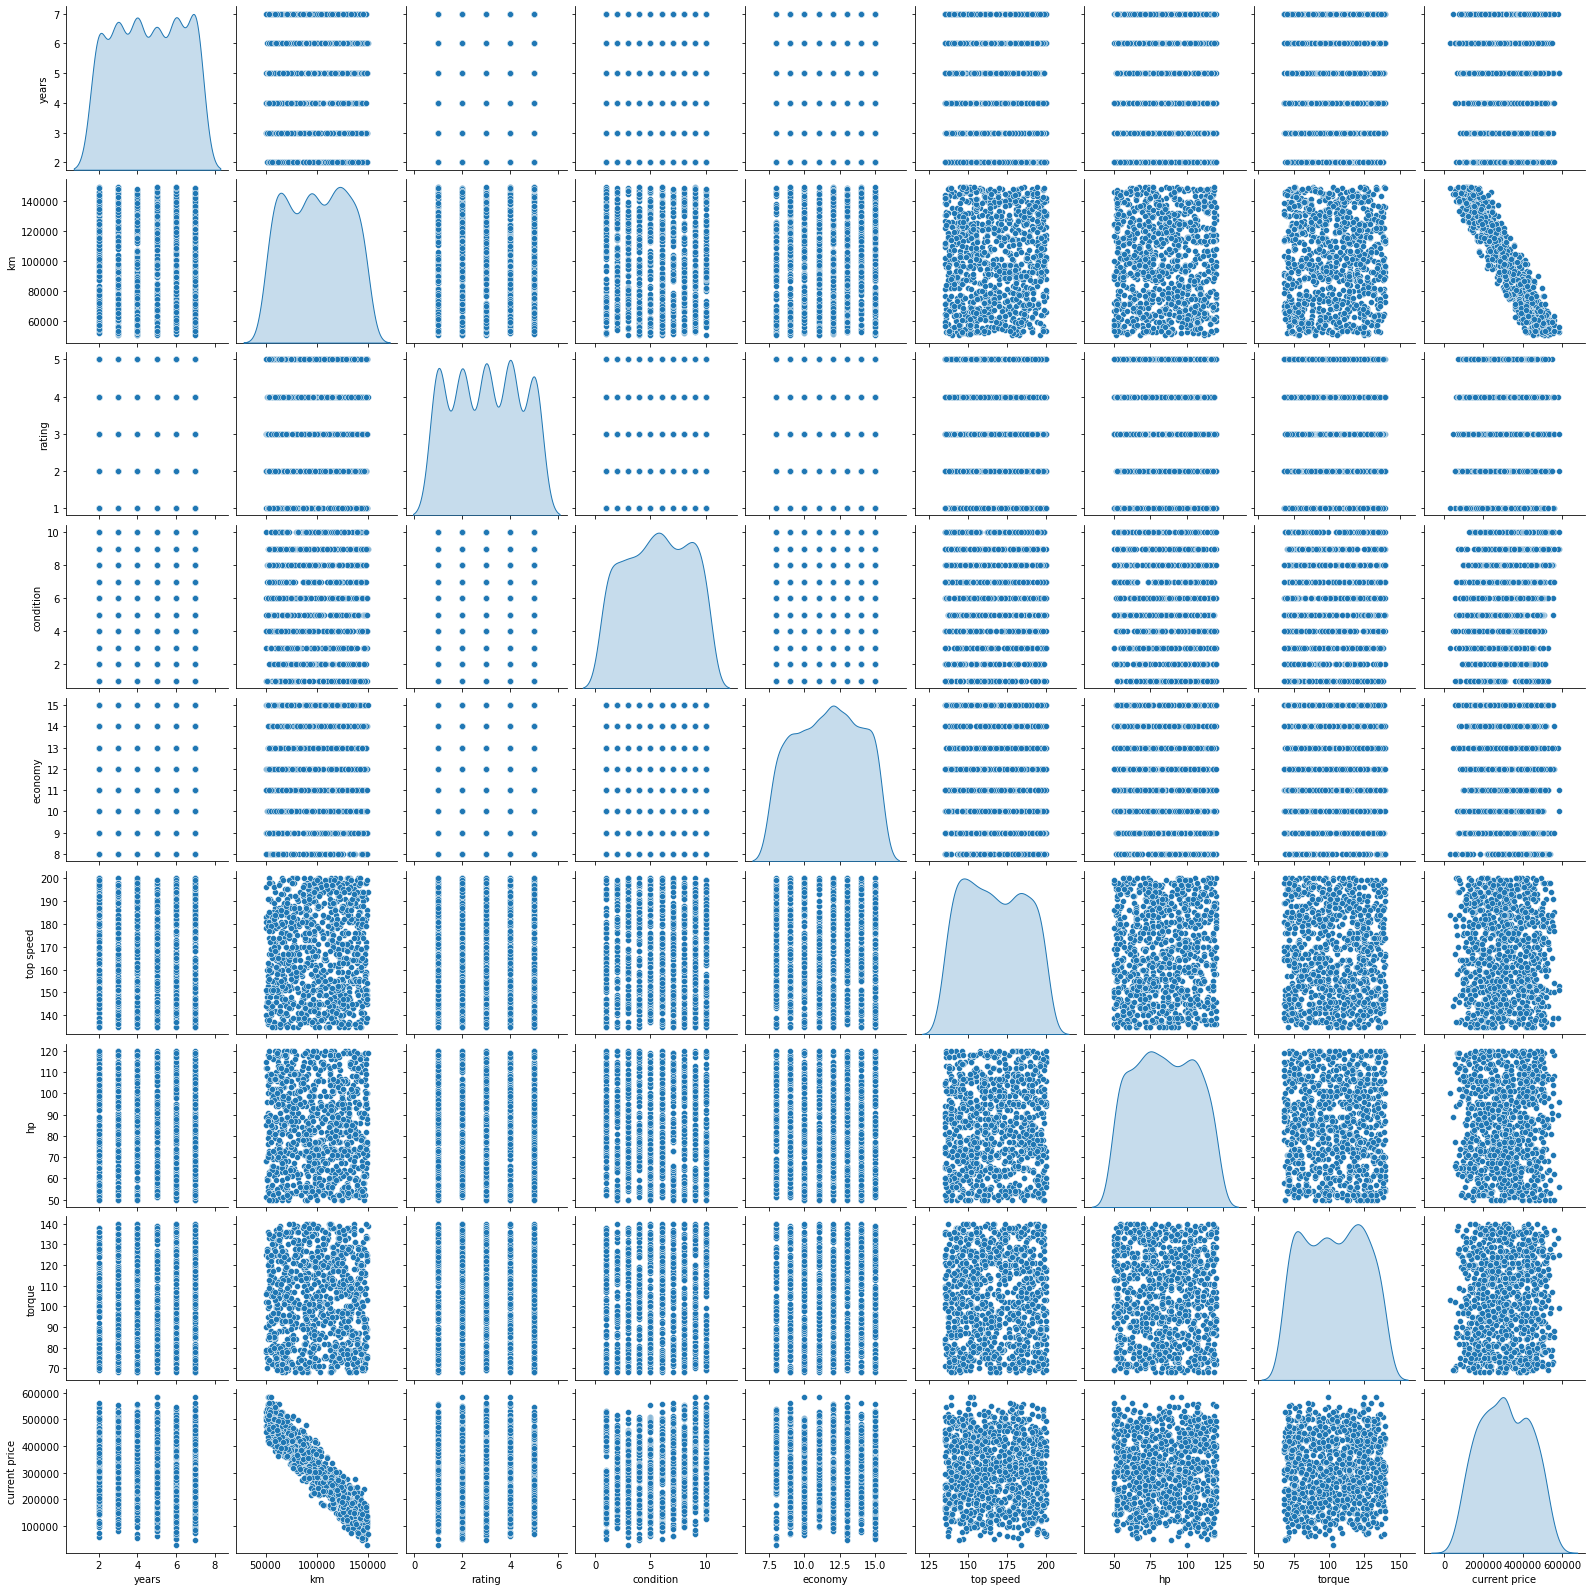

In [6]:
sns.pairplot(model_data,  diag_kind='kde') ##kde means kernel density estimate
##the kde is diagonal in this plot
##this plot shows how how each column relates to one another 
##the current price and km shows a pattern that the higher price, the lower the km


In [7]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32) ## casting the data as a float data type
print(tensor_data)


tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [8]:
##randomly shuffle the data so that v_id is not the order factor anymore
tensor_data = tf.random.shuffle(tensor_data)
tensor_data[1]

<tf.Tensor: shape=(12,), dtype=float32, numpy=
array([5.49000e+02, 5.26541e+05, 8.41712e+05, 6.00000e+00, 1.03918e+05,
       4.00000e+00, 7.00000e+00, 1.40000e+01, 1.45000e+02, 1.15000e+02,
       1.02000e+02, 2.73761e+05], dtype=float32)>

In [9]:
##selecting only relevant data for the x tensor, which the input data
x = tensor_data[:, 3:-1]
print(x.shape)
print(x[:5])

(1000, 8)
tf.Tensor(
[[6.00000e+00 7.44440e+04 5.00000e+00 3.00000e+00 8.00000e+00 1.88000e+02
  8.00000e+01 7.90000e+01]
 [6.00000e+00 1.03918e+05 4.00000e+00 7.00000e+00 1.40000e+01 1.45000e+02
  1.15000e+02 1.02000e+02]
 [6.00000e+00 6.81880e+04 4.00000e+00 7.00000e+00 1.00000e+01 1.86000e+02
  8.60000e+01 1.35000e+02]
 [3.00000e+00 6.57100e+04 2.00000e+00 6.00000e+00 1.30000e+01 1.65000e+02
  1.07000e+02 1.24000e+02]
 [4.00000e+00 1.00572e+05 3.00000e+00 9.00000e+00 1.20000e+01 1.41000e+02
  6.30000e+01 7.10000e+01]], shape=(5, 8), dtype=float32)


In [10]:
##selecting only relevant data for the y tensor, which is the output data
y = tensor_data[:, -1]
print(y.shape)
print(y[:5])


(1000,)
tf.Tensor([392635.5 273761.  408405.5 457581.  322684. ], shape=(5,), dtype=float32)


In [11]:
y = tensor_data[:,-1]
print(y[:5].shape)
y = tf.expand_dims(y, axis = -1) ## this expands the data and makes it a 2D data
print(y[:5])
     

(5,)
tf.Tensor(
[[392635.5]
 [273761. ]
 [408405.5]
 [457581. ]
 [322684. ]], shape=(5, 1), dtype=float32)


In [12]:
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1
dataset_size = len(x)

In [13]:
len(x)

1000

In [14]:
x_train = x[:int(dataset_size*train_ratio)]
y_train = y[:int(dataset_size*train_ratio)]
print(x_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [15]:
x_validation = x[int(dataset_size*train_ratio):int(dataset_size*(train_ratio+validation_ratio))]
y_validation = y[int(dataset_size*train_ratio):int(dataset_size*(train_ratio+validation_ratio))]

print(x_validation.shape)
print(y_validation.shape)

(100, 8)
(100, 1)


In [16]:
x_test= x[int(dataset_size*(train_ratio+validation_ratio)):]
y_test = y[int(dataset_size*(train_ratio+validation_ratio)):]

print(x_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


##### Another transformation that can be done to the data to enable the data train faster is by normalizing the data.

This is done by normalizing the input data ie subtract the mean from the input data and divide by the standard deviation.
    
                x - mean
                ________
    
            standard deviation
            

You can use the `tf.keras.layer.Normalization()` for normalizing the data. when keras is imported just use `Normalization()`

**standard deviation is the square root of variance.**



In [17]:
## normalization is done for each column
normalizer = Normalization(axis = 1, mean = 5, variance = 4)
x_normalized = tf.constant([[3, 4, 5, 6, 7], [5, 6 , 7, 8, 9]])
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [ 0. ,  0.5,  1. ,  1.5,  2. ]], dtype=float32)>

In [18]:
## demonstration of how normalization works
(3 - 5) / 2
(6 - 5) / 2

0.5

In [19]:
##normalizing the input data
normalizer = Normalization() ##not putting anything in the bracket inserts mean and sd automatically
normalizer.adapt(x)
normalizer(x)

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[ 0.8374943 , -0.8865502 ,  1.4350011 , ...,  1.0948347 ,
        -0.22168338, -1.160337  ],
       [ 0.8374943 ,  0.12505467,  0.72178   , ..., -1.1356024 ,
         1.4850776 , -0.06760625],
       [ 0.8374943 , -1.1012682 ,  0.72178   , ...,  0.99109346,
         0.07090422,  1.5002248 ],
       ...,
       [ 0.8374943 ,  0.92832536, -1.4178834 , ...,  1.613541  ,
        -1.0506816 ,  1.5477349 ],
       [-1.4904968 ,  0.49528542,  1.4350011 , ...,  0.47238714,
         0.5585502 , -1.6354374 ],
       [ 1.4194921 ,  0.97541505,  1.4350011 , ..., -0.0981898 ,
         0.02213962, -0.63772666]], dtype=float32)>

In [20]:
x

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[6.00000e+00, 7.44440e+04, 5.00000e+00, ..., 1.88000e+02,
        8.00000e+01, 7.90000e+01],
       [6.00000e+00, 1.03918e+05, 4.00000e+00, ..., 1.45000e+02,
        1.15000e+02, 1.02000e+02],
       [6.00000e+00, 6.81880e+04, 4.00000e+00, ..., 1.86000e+02,
        8.60000e+01, 1.35000e+02],
       ...,
       [6.00000e+00, 1.27322e+05, 1.00000e+00, ..., 1.98000e+02,
        6.30000e+01, 1.36000e+02],
       [2.00000e+00, 1.14705e+05, 5.00000e+00, ..., 1.76000e+02,
        9.60000e+01, 6.90000e+01],
       [7.00000e+00, 1.28694e+05, 5.00000e+00, ..., 1.65000e+02,
        8.50000e+01, 9.00000e+01]], dtype=float32)>

## Linear Regression

#### **y = mx + c**
m is the weight, x is the horse power and c is the constant/bias

`The data flow`

**x --> *m --> mx --> +c --> y**

input --> model --> output

a model increasing/flowing upwards **( / )** on the graph is better than a model flowing downwards **( \ )** on the graph


In [21]:
##creating the model

model = tf.keras.Sequential([normalizer, Dense(1),])
print(model)
model.summary() ##to view summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 26
Trainable params: 9
Non-trainable params: 17
_________________________________________________________________


Three ways of creating models wit
- Sequential API
- Functional API
- subclassing method

In [22]:
## another method of creating a model
model = tf.keras.Sequential()
model.add(normalizer)
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26
Trainable params: 9
Non-trainable params: 17
_________________________________________________________________


**Sequential means that the way models are built in layers are Sequential**

The model is made up of the normalized and dense layer

In the modelling dense layer, there are 8 columns in this data plus the C ie bias which is why there are 9 trainable params.
It is non trainable because normalization has been applied to it and there is no need to modify the mean and variance anymore.

Dense is set at 1 because there will be only one output, if you want more than 1 include it

In [ ]:
pip install pydot

In [ ]:
conda install graphviz 

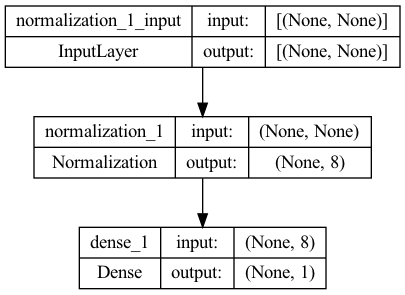

In [23]:
## to plot the model
tf.keras.utils.plot_model(model, to_file = 'model.png', show_shapes=True)


We will not load all the data at once, we will just uploaded in small batches, it is advisable to only load 32 and below datasets to avoid over feeding problems.
Define the input layer by the batch size they will be uploaded eg (32, 8)


In [24]:
model = tf.keras.Sequential([
                             InputLayer(input_shape = (8,)),
                             normalizer,
                             #Dense(128, activation = "relu"),
                             #Dense(128, activation = "relu"),
                             #Dense(128, activation = "relu"),
                             Dense(1),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26
Trainable params: 9
Non-trainable params: 17
_________________________________________________________________


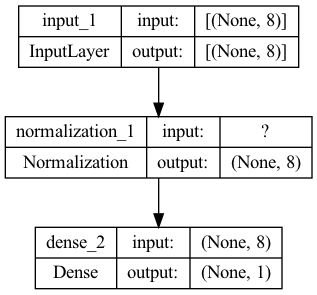

In [25]:
## to plot the model
tf.keras.utils.plot_model(model, to_file = 'model.png', show_shapes=True)


Because the inputlayer has been defined now it is no longer none but now we know the shape of our input


#### Error Sanctioning and Measurement

Now we will know how representative our model is of our dataset. we will compare the actual output and what our model gives us as predicted price. If the difference is too large then there is an error, minimising this error gap is referred to as error sanctioning.

Use the `tf.keras.losses.MeanSquaredError()` function

model.compile(loss=MeanSquaredError())

It is advisable to use the MeanAbsoluteError() to avoid doubling the error value, instead you just get the absolute value not double.

Use the `tf.keras.losses.MeanAbsoluteError()` function



In [26]:

model.compile(optimizer = Adam(learning_rate = 0.1),
              loss = MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

#### Training and Optimization

In [27]:
##epoch means the number of times we are going to update our weight
##verbose has to do with the output from our training step
model.fit(x, y, epochs = 100, verbose =1)
##Now we get the absolute value of the difference between our model predictions and actual current price


Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 308518.7812 - root_mean_squared_error: 333260.5312
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 308515.5938 - root_mean_squared_error: 333257.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 308512.3438 - root_mean_squared_error: 333254.5625
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 308509.1875 - root_mean_squared_error: 333251.5625
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 308506.0312 - root_mean_squared_error: 333248.5312
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 308502.7812 - root_mean_squared_error: 333245.6250
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 308499.5938 - root_mean_squared_error: 333242.7812
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 308496.3438 - root_mean_squared_error: 333239.8438
Epoch 9/

In [28]:
model.compile(loss = MeanAbsoluteError())

In [29]:
model.fit(x, y, epochs = 100, verbose =1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 308200.1875
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 308200.1562
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 308200.0938
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 308200.0938
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 308200.0938
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 308200.0312
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 308200.0625
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 308199.9375
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 308199.9688
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 308199.9062
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 308199.9062
Epoch 12/100
32/32 [==============================] - 0s 1ms/st

In [ ]:
## This Configures the model for training. the most commonly used optimizer is Adam

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3) ##learning rate controls how quickly the model is adapted to the problem.,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])


In [30]:
model.compile(optimizer= Adam(),
             loss = MeanAbsoluteError())

In [31]:
history=model.fit(x, y, epochs = 100, verbose =1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 308197.0000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 308196.9375
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 308196.9062
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 308196.8750
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 308196.8750
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 308196.8438
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 308196.7500
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 308196.7500
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 308196.7188
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 308196.7188
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 308196.6875
Epoch 12/100
32/32 [==============================] - 0s 1ms/st

In [32]:
##this gives us the history of all our loss values
history.history

{'loss': [308197.0,
  308196.9375,
  308196.90625,
  308196.875,
  308196.875,
  308196.84375,
  308196.75,
  308196.75,
  308196.71875,
  308196.71875,
  308196.6875,
  308196.625,
  308196.53125,
  308196.5625,
  308196.5,
  308196.46875,
  308196.53125,
  308196.4375,
  308196.34375,
  308196.34375,
  308196.375,
  308196.3125,
  308196.28125,
  308196.21875,
  308196.1875,
  308196.15625,
  308196.125,
  308196.09375,
  308196.0625,
  308196.0625,
  308196.03125,
  308196.0,
  308196.0,
  308195.9375,
  308195.90625,
  308195.8125,
  308195.84375,
  308195.8125,
  308195.78125,
  308195.75,
  308195.65625,
  308195.6875,
  308195.65625,
  308195.59375,
  308195.59375,
  308195.53125,
  308195.5,
  308195.5,
  308195.40625,
  308195.40625,
  308195.40625,
  308195.28125,
  308195.375,
  308195.28125,
  308195.28125,
  308195.21875,
  308195.15625,
  308195.15625,
  308195.125,
  308195.125,
  308195.0625,
  308195.03125,
  308195.0,
  308194.9375,
  308194.875,
  308194.90625,
  308

<function matplotlib.pyplot.show(close=None, block=None)>

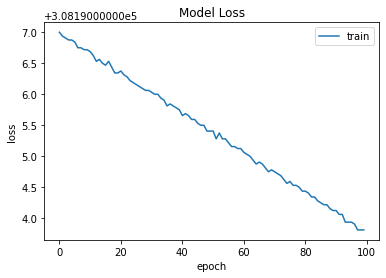

In [33]:
##plot the history values
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show

In [34]:
##speed up the training by modifying the learning rate
model.compile(optimizer= Adam(learning_rate=1),
             loss = MeanAbsoluteError())

<function matplotlib.pyplot.show(close=None, block=None)>

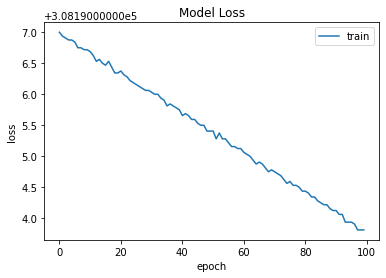

In [35]:
##plot the history values
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show
##the loss drops a little faster than earlier

#### Performance Measurement
In this step, we are measuring how well the model performs. The most common function used for this is the Root Mean Squared Error. This helps us to compare if two models are performing in order and which model performs better or which model outperforms the other 

In [66]:
model.compile(optimizer= Adam(learning_rate=1),
             loss = MeanAbsoluteError(),
             metrics = RootMeanSquaredError())

In [67]:
history=model.fit(x, y, epochs = 100, verbose =1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 311577.7188 - root_mean_squared_error: 336966.7812
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 180438.0938 - root_mean_squared_error: 232408.6250
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 76081.0781 - root_mean_squared_error: 97620.4766
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 58375.9844 - root_mean_squared_error: 73420.5625
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 49381.8945 - root_mean_squared_error: 62500.8438
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 47002.6602 - root_mean_squared_error: 59339.0039
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 44405.3828 - root_mean_squared_error: 55535.1484
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 40832.7461 - root_mean_squared_error: 50472.5078
Epoch 9/100
32/32 [=

In [68]:
history.history

{'loss': [311577.71875,
  180438.09375,
  76081.078125,
  58375.984375,
  49381.89453125,
  47002.66015625,
  44405.3828125,
  40832.74609375,
  40713.625,
  41114.33203125,
  38996.375,
  40074.35546875,
  40418.52734375,
  39928.0859375,
  39073.6796875,
  36829.49609375,
  36091.10546875,
  37854.7109375,
  38420.9140625,
  37843.08984375,
  40414.06640625,
  36259.87890625,
  35853.359375,
  39836.90625,
  35357.08984375,
  39277.35546875,
  37510.1171875,
  40456.85546875,
  36495.4765625,
  37125.265625,
  35978.265625,
  38166.72265625,
  38566.9375,
  38740.64453125,
  37287.8984375,
  36497.95703125,
  38077.93359375,
  34678.62109375,
  41175.09765625,
  37520.63671875,
  35566.05078125,
  37824.27734375,
  42101.4921875,
  35994.9765625,
  36886.890625,
  43988.28515625,
  36446.68359375,
  37939.48046875,
  38560.0390625,
  35408.953125,
  36698.98828125,
  37453.375,
  33600.96875,
  37787.5625,
  37881.09375,
  38892.7109375,
  35040.234375,
  35705.4921875,
  36822.40625

<function matplotlib.pyplot.show(close=None, block=None)>

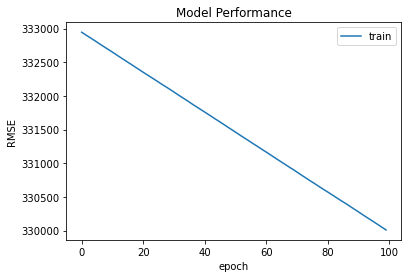

In [39]:
##plot the performance evaluation
plt.plot(history.history['root_mean_squared_error'])
plt.title('Model Performance')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show

In [40]:
##This is used to evaluate the model
model.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 304993.7500 - root_mean_squared_error: 329993.8438


[304993.75, 329993.84375]

#### Validation and Testing
External validation from a data that the model has never seen is needed to ensure the model is actually performing and can come up with the right prediction close to the current price.
If the RMSE is significantly higher for the test data than the train data then this is a poor performing model because it only performs well on data it has seen and not unseen data.
While doing the training always have a validation dataset to test so that you do not realise its a poor performing model after concluding the training, divide the dataset into training and testing dataset. 

Do this at the data preparation section at the begining.

In [ ]:
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1
dataset_size = len(x)

In [69]:
model.compile(optimizer= Adam(learning_rate=1),
             loss = MeanAbsoluteError(),
             metrics = RootMeanSquaredError())

In [70]:
history = model.fit(x_train, y_train,validation_data=(x_validation, y_validation),
                    epochs=100, verbose= 1)

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 67467.2109 - root_mean_squared_error: 85454.7891 - val_loss: 29863.9844 - val_root_mean_squared_error: 37320.8242
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 36521.3828 - root_mean_squared_error: 45326.4688 - val_loss: 36354.1445 - val_root_mean_squared_error: 44603.5391
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 34980.5781 - root_mean_squared_error: 43780.2148 - val_loss: 33456.6836 - val_root_mean_squared_error: 40970.8711
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 33518.0234 - root_mean_squared_error: 42224.1406 - val_loss: 41572.2422 - val_root_mean_squared_error: 52272.3672
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 33916.6289 - root_mean_squared_error: 43133.6836 - val_loss: 32118.3281 - val_root_mean_squared_error: 40261.8125
Epoch 6/100
25/25 [==============================] - 0s 4ms/step 

Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 31523.4258 - root_mean_squared_error: 40091.2305 - val_loss: 33911.1484 - val_root_mean_squared_error: 42572.5742
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 31019.7246 - root_mean_squared_error: 40278.4883 - val_loss: 35457.4609 - val_root_mean_squared_error: 44249.8984
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 35756.9648 - root_mean_squared_error: 45713.5469 - val_loss: 38682.7266 - val_root_mean_squared_error: 48387.3398
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 31360.4473 - root_mean_squared_error: 39575.2070 - val_loss: 41434.2852 - val_root_mean_squared_error: 50867.9609
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 32057.3301 - root_mean_squared_error: 40536.9102 - val_loss: 40153.3359 - val_root_mean_squared_error: 49944.4609
Epoch 93/100
25/25 [==============================] - 0s 2ms

In [71]:
history.history

{'loss': [67467.2109375,
  36521.3828125,
  34980.578125,
  33518.0234375,
  33916.62890625,
  33753.609375,
  34137.92578125,
  34514.72265625,
  37186.48046875,
  33353.44921875,
  32916.7265625,
  32638.373046875,
  35258.65625,
  33000.59765625,
  37521.4921875,
  33259.59375,
  33244.7109375,
  34786.43359375,
  33445.37890625,
  32444.39453125,
  37075.12890625,
  34976.32421875,
  33086.85546875,
  36544.43359375,
  33203.7265625,
  33042.69140625,
  37789.0703125,
  34362.23828125,
  31976.8828125,
  32530.69921875,
  35945.66015625,
  32235.091796875,
  34505.140625,
  39866.8125,
  33126.23828125,
  33084.74609375,
  32479.7109375,
  32962.68359375,
  32529.453125,
  32689.634765625,
  31709.29296875,
  31541.732421875,
  35390.234375,
  34019.8046875,
  38085.65625,
  36014.5234375,
  34088.8828125,
  32105.037109375,
  33890.50390625,
  33745.82421875,
  39363.6015625,
  34350.48828125,
  32754.625,
  35968.16796875,
  35157.15625,
  36711.47265625,
  33566.43359375,
  3345

<function matplotlib.pyplot.show(close=None, block=None)>

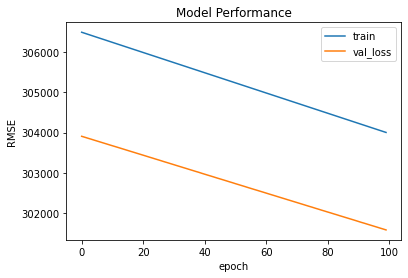

In [44]:
##plot the performance evaluation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

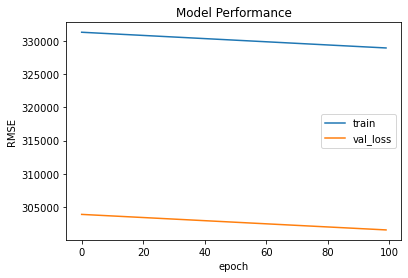

In [45]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show

In [46]:
x_test.shape

TensorShape([100, 8])

#### Request the Model to make a prediction

In [52]:
model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


array([[5506.759 ],
       [6747.4033],
       [6241.299 ],
       [5082.717 ],
       [5153.0566],
       [4948.2974],
       [6796.9355],
       [5635.315 ],
       [4973.633 ],
       [5602.4517],
       [6447.4307],
       [6381.5957],
       [5527.392 ],
       [5884.342 ],
       [6136.012 ],
       [6024.0376],
       [5212.486 ],
       [6520.359 ],
       [4924.156 ],
       [5508.006 ],
       [5505.0425],
       [5981.102 ],
       [6978.148 ],
       [6559.375 ],
       [5569.626 ],
       [6183.032 ],
       [5189.5615],
       [5874.492 ],
       [6729.369 ],
       [5823.27  ],
       [5996.617 ],
       [5208.561 ],
       [5920.418 ],
       [5264.142 ],
       [6863.2607],
       [6179.631 ],
       [6901.731 ],
       [5617.798 ],
       [6261.701 ],
       [5528.4893],
       [6335.6826],
       [5180.619 ],
       [6195.126 ],
       [5492.9976],
       [6913.0034],
       [6972.7305],
       [5696.62  ],
       [6550.0376],
       [5252.873 ],
       [6202.3213],


In [56]:
model.predict(tf.expand_dims(x_test[0], axis=0))

1/1 [==============================] - 0s 23ms/step


array([[5506.759]], dtype=float32)

In [55]:
model.predict(tf.expand_dims(x_test[0], axis=0)).shape

1/1 [==============================] - 0s 20ms/step


(1, 1)

In [57]:
##because the values of the prediction and this y_test are significantly different
##it shows that our model is performing poorly
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([176858.], dtype=float32)>

In [59]:
y_true = list(y_test[:,0].numpy())
y_true

[176858.0,
 340777.0,
 124183.5,
 177933.5,
 77167.0,
 128632.5,
 369149.0,
 315959.0,
 432159.5,
 494542.0,
 327075.5,
 168854.5,
 486699.0,
 111185.0,
 221510.0,
 328973.5,
 392920.5,
 180912.0,
 295021.0,
 380231.0,
 421679.5,
 248738.0,
 515167.5,
 130233.5,
 459686.5,
 94467.5,
 220518.0,
 386141.0,
 353318.0,
 146568.0,
 481862.0,
 221412.5,
 406657.5,
 500903.0,
 404800.5,
 150234.5,
 301042.5,
 179077.0,
 206591.0,
 431060.0,
 156825.5,
 244287.5,
 136079.0,
 526394.0,
 427079.0,
 497572.5,
 236994.0,
 333133.0,
 317119.0,
 191566.0,
 140596.0,
 108223.5,
 243006.5,
 308220.5,
 335093.5,
 389610.0,
 513722.5,
 293841.0,
 242709.5,
 379608.0,
 248248.5,
 70862.0,
 177509.5,
 190956.5,
 312323.5,
 242950.0,
 400027.5,
 178642.5,
 140884.0,
 222063.5,
 547746.0,
 223369.5,
 190744.0,
 226087.5,
 451140.5,
 343416.5,
 467074.5,
 430469.0,
 321363.0,
 496671.0,
 218814.0,
 476969.5,
 330887.0,
 272437.5,
 181414.5,
 245854.5,
 396244.0,
 446300.5,
 166283.0,
 306690.0,
 287675.0,
 4

In [60]:
y_pred = list(model.predict(x_test)[:,0])
y_pred

4/4 [==============================] - 0s 5ms/step


[5506.759,
 6747.4033,
 6241.299,
 5082.717,
 5153.0566,
 4948.2974,
 6796.9355,
 5635.315,
 4973.633,
 5602.4517,
 6447.4307,
 6381.5957,
 5527.392,
 5884.342,
 6136.012,
 6024.0376,
 5212.486,
 6520.359,
 4924.156,
 5508.006,
 5505.0425,
 5981.102,
 6978.148,
 6559.375,
 5569.626,
 6183.032,
 5189.5615,
 5874.492,
 6729.369,
 5823.27,
 5996.617,
 5208.561,
 5920.418,
 5264.142,
 6863.2607,
 6179.631,
 6901.731,
 5617.798,
 6261.701,
 5528.4893,
 6335.6826,
 5180.619,
 6195.126,
 5492.9976,
 6913.0034,
 6972.7305,
 5696.62,
 6550.0376,
 5252.873,
 6202.3213,
 6050.1245,
 5503.825,
 6318.1113,
 6275.1953,
 5704.551,
 6306.2134,
 5773.117,
 5000.079,
 6160.5713,
 5478.022,
 6244.6753,
 6834.119,
 6558.6416,
 5944.84,
 6827.0947,
 5391.7207,
 6728.0103,
 5518.7266,
 5104.552,
 5310.4897,
 6590.405,
 5732.811,
 5240.0005,
 6262.2764,
 5635.797,
 5668.1753,
 6211.094,
 6871.4014,
 5321.7695,
 6007.862,
 6260.38,
 6008.135,
 5951.048,
 6308.1733,
 5787.4214,
 5961.6807,
 6236.5176,
 7010.45

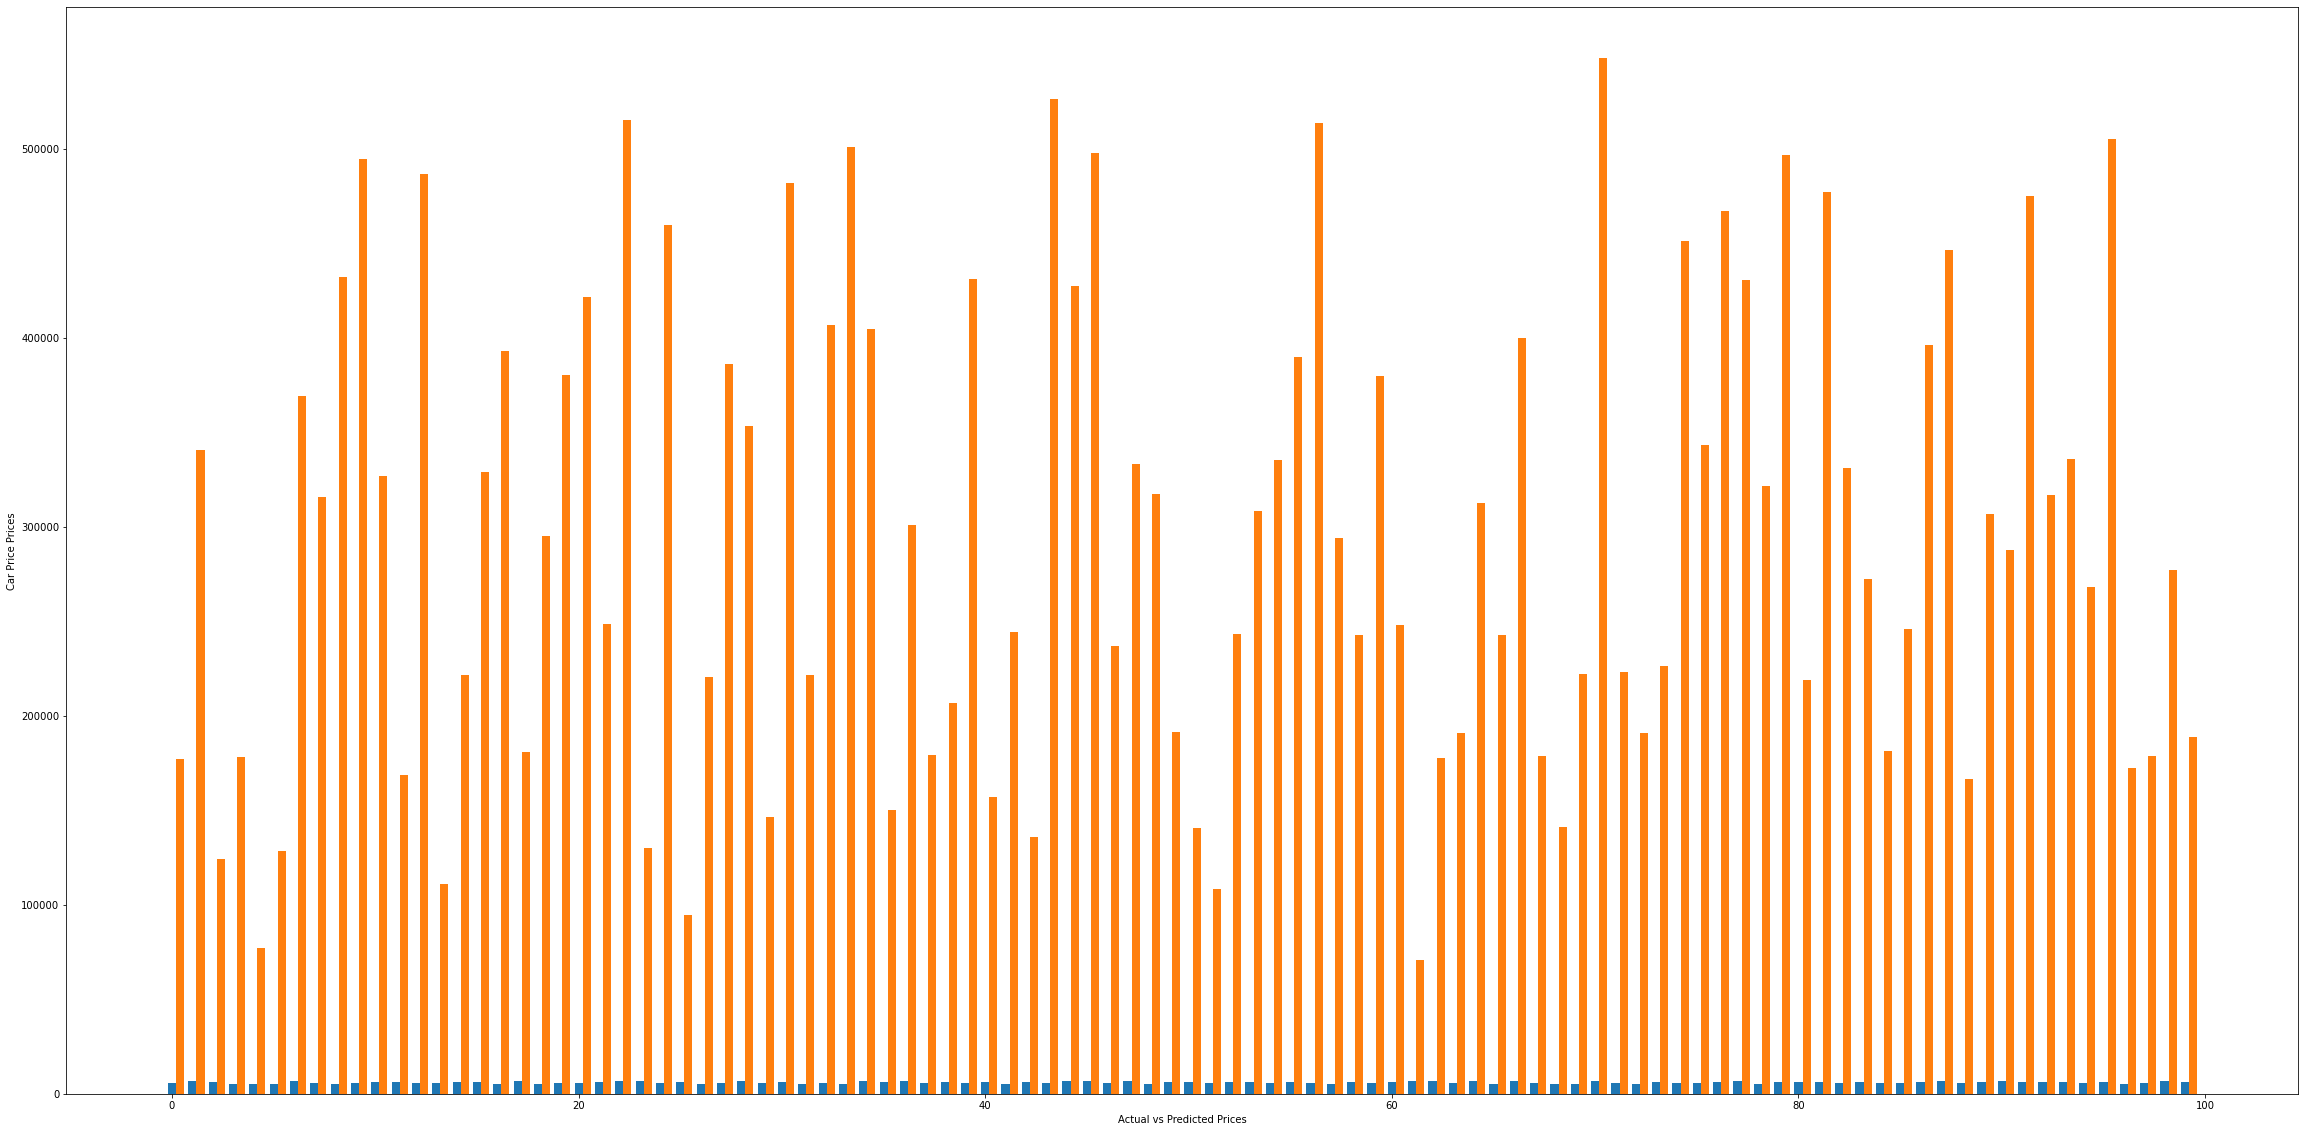

In [61]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.4

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()

##This shows clearly that our model is performing poorly as there is significant disparity

#### Corrective Measures
A poor performing model is called under fitting, to fix this you have to make the model more complex such as stacking up more neurons, adding more dense and hidden layers as it is a simple hidden layer that causes a poorly performing model.

Common activation functions that are used are the sigmoid activation function, tensh activation function, relu activation function, rectified linear unit and leaky relu.

In [63]:
##stack up multiple neurons on each other creating multiple dense layer and add activation relu
model = tf.keras.Sequential([
                             InputLayer(input_shape = (8,)),
                             normalizer,
                             Dense(32, activation = "relu"), ##32 neurons
                             Dense(32, activation = "relu"),
                             Dense(32, activation = "relu"),
                             Dense(1) ##ensure you have just 1 neuron,
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 32)                288       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,450
Trainable params: 2,433
Non-trainable params: 17
___________________________________________________

In [64]:
##To make the model more complicated, increase the dense layer
model = tf.keras.Sequential([
                             InputLayer(input_shape = (8,)),
                             normalizer,
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1),
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_7 (Dense)             (None, 128)               1152      
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 34,322
Trainable params: 34,305
Non-trainable params: 17
_________________________________________________

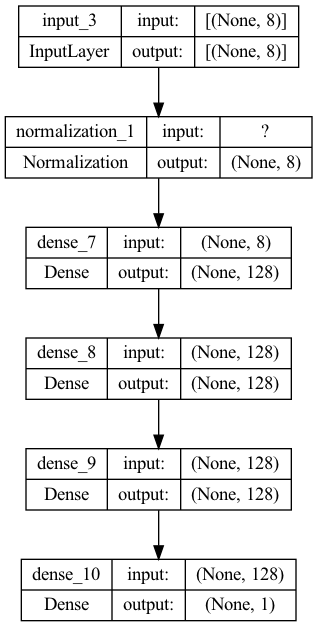

In [65]:
## to plot the model
tf.keras.utils.plot_model(model, to_file = 'model.png', show_shapes=True)


Then compile and fit the model for prediction

<function matplotlib.pyplot.show(close=None, block=None)>

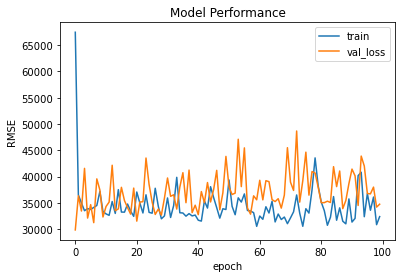

In [72]:
##plot the performance evaluation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

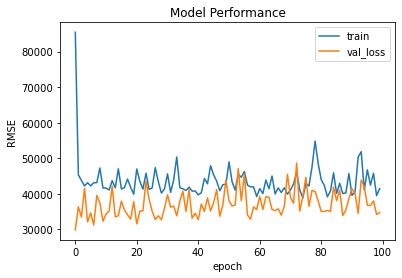

In [73]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show

The plots are significantly different. If a model performs well on the training data but not on the validation loss then there is a problem called over feeding.

In [75]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 42734.1289 - root_mean_squared_error: 52160.5703


[42734.12890625, 52160.5703125]

In [76]:
y_true = list(y_test[:,0].numpy())
y_true

[176858.0,
 340777.0,
 124183.5,
 177933.5,
 77167.0,
 128632.5,
 369149.0,
 315959.0,
 432159.5,
 494542.0,
 327075.5,
 168854.5,
 486699.0,
 111185.0,
 221510.0,
 328973.5,
 392920.5,
 180912.0,
 295021.0,
 380231.0,
 421679.5,
 248738.0,
 515167.5,
 130233.5,
 459686.5,
 94467.5,
 220518.0,
 386141.0,
 353318.0,
 146568.0,
 481862.0,
 221412.5,
 406657.5,
 500903.0,
 404800.5,
 150234.5,
 301042.5,
 179077.0,
 206591.0,
 431060.0,
 156825.5,
 244287.5,
 136079.0,
 526394.0,
 427079.0,
 497572.5,
 236994.0,
 333133.0,
 317119.0,
 191566.0,
 140596.0,
 108223.5,
 243006.5,
 308220.5,
 335093.5,
 389610.0,
 513722.5,
 293841.0,
 242709.5,
 379608.0,
 248248.5,
 70862.0,
 177509.5,
 190956.5,
 312323.5,
 242950.0,
 400027.5,
 178642.5,
 140884.0,
 222063.5,
 547746.0,
 223369.5,
 190744.0,
 226087.5,
 451140.5,
 343416.5,
 467074.5,
 430469.0,
 321363.0,
 496671.0,
 218814.0,
 476969.5,
 330887.0,
 272437.5,
 181414.5,
 245854.5,
 396244.0,
 446300.5,
 166283.0,
 306690.0,
 287675.0,
 4

In [77]:
y_pred = list(model.predict(x_test)[:,0])
y_pred

4/4 [==============================] - 0s 2ms/step


[144580.95,
 323326.9,
 165479.6,
 116905.586,
 136486.1,
 140640.1,
 281534.06,
 401965.7,
 362907.16,
 413710.3,
 364489.6,
 227021.11,
 508697.78,
 102724.445,
 223430.12,
 379791.7,
 412328.66,
 175363.16,
 219978.14,
 300055.56,
 416711.72,
 234770.2,
 441800.88,
 189864.77,
 464989.94,
 115688.38,
 231158.83,
 328923.25,
 334173.4,
 143102.25,
 423357.25,
 228774.62,
 353418.47,
 463404.38,
 383602.12,
 150145.48,
 287609.47,
 127863.195,
 235787.58,
 419552.84,
 196401.58,
 326390.97,
 202233.14,
 469755.38,
 388629.97,
 432118.2,
 188375.36,
 302398.88,
 365516.34,
 84286.234,
 200147.02,
 140142.25,
 246490.97,
 293937.56,
 301679.9,
 323614.1,
 420551.25,
 346201.94,
 268994.22,
 357791.12,
 205079.81,
 215430.7,
 214223.92,
 210995.47,
 345391.94,
 208886.28,
 298315.75,
 198860.25,
 180120.75,
 270322.94,
 418827.2,
 222783.39,
 199710.92,
 168985.62,
 443672.16,
 311753.22,
 466628.3,
 347766.72,
 366569.2,
 432019.72,
 198941.55,
 409972.56,
 292548.8,
 215633.72,
 182299

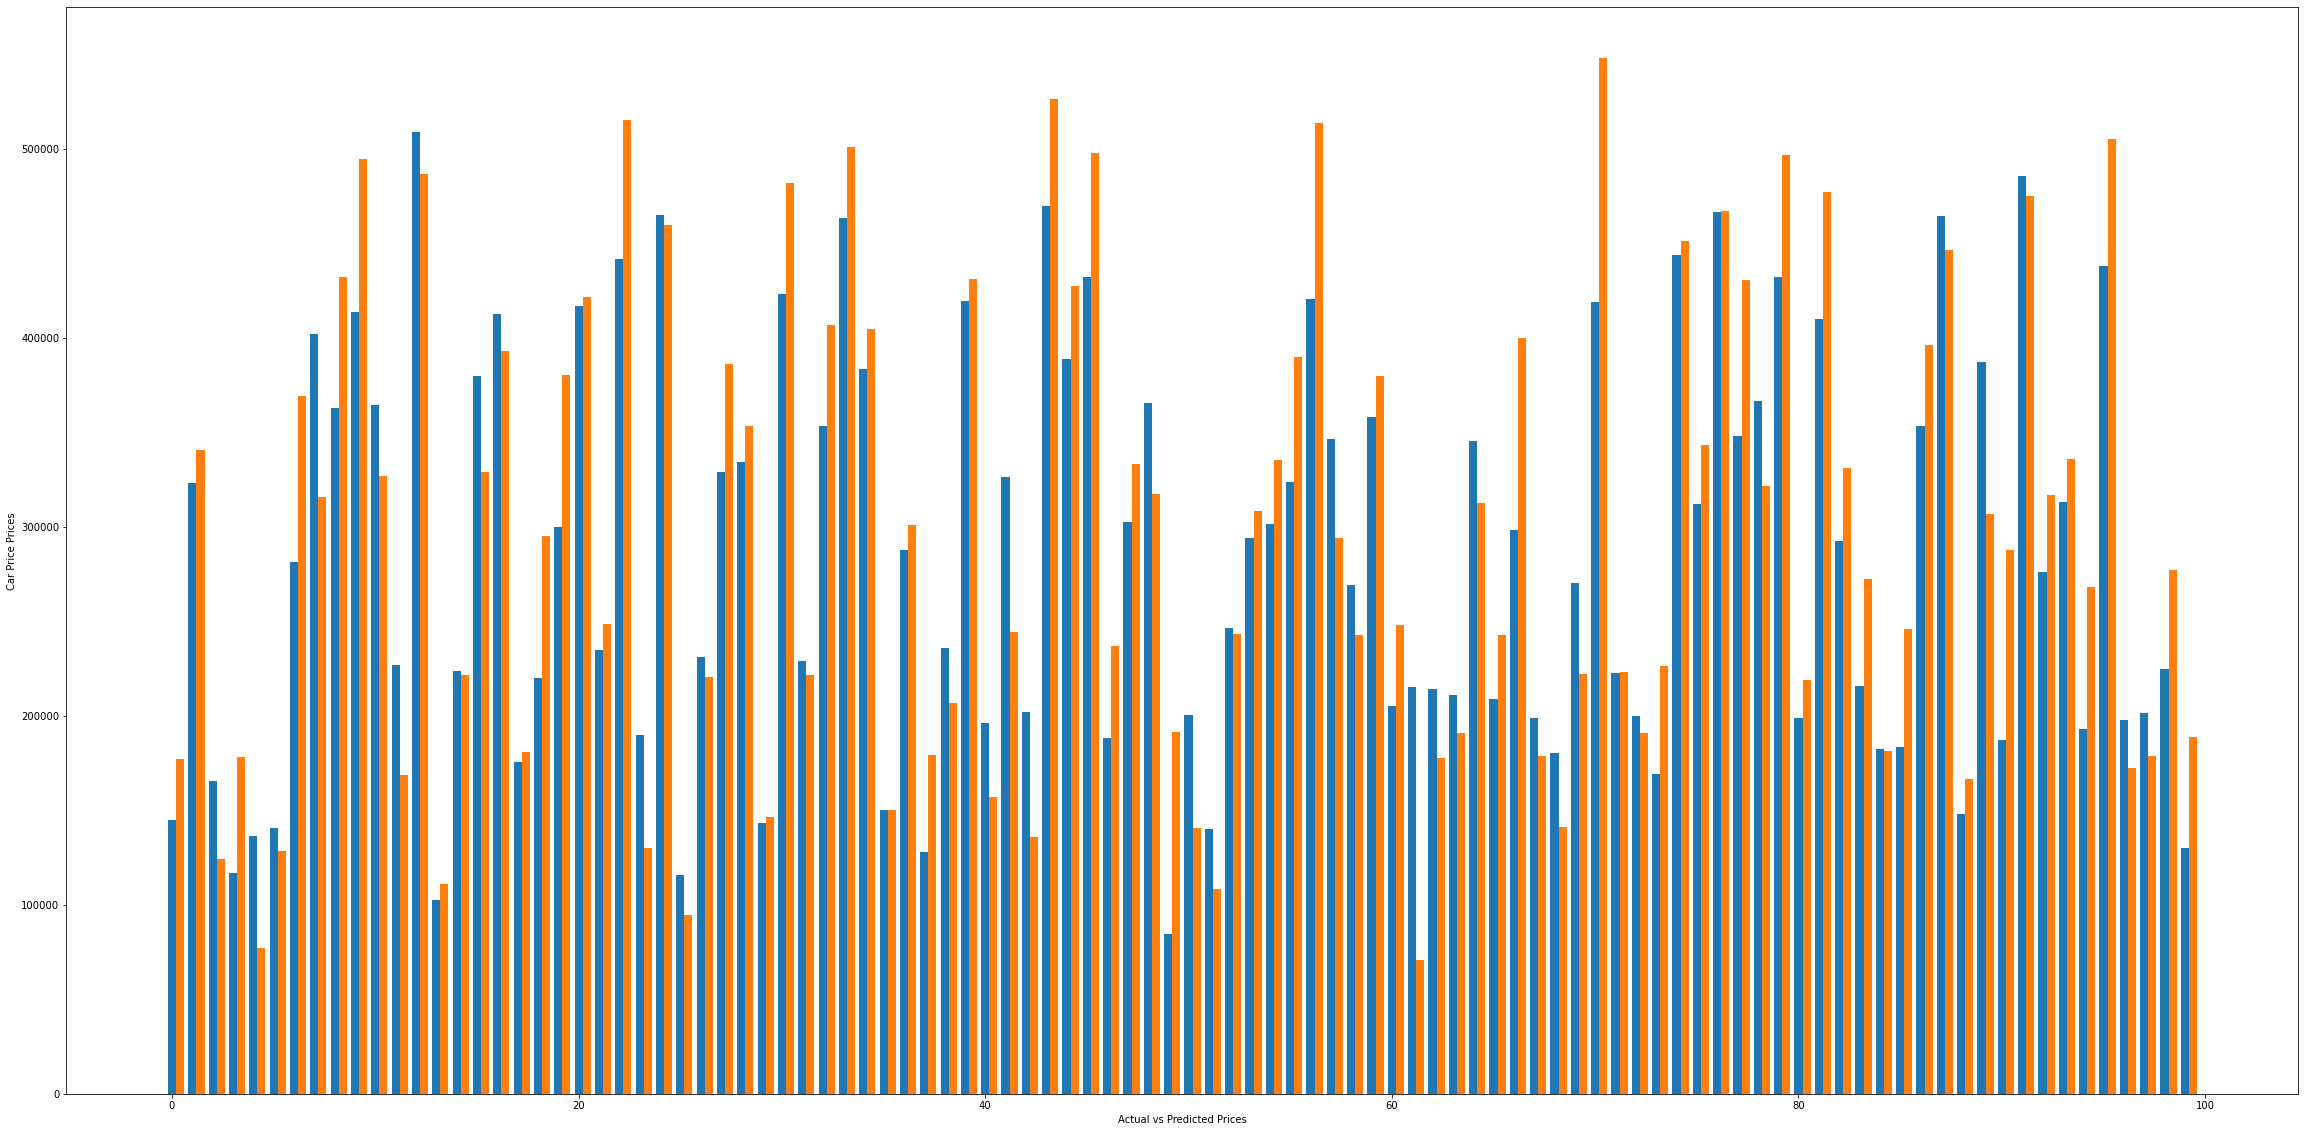

In [78]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.4

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()

##This shows clearly that our model is performing better compared to the actual data as there is not much significant disparity

#### How to load our data even faster and more efficiently
This can be done using `tf.data.Dataset`

In [ ]:
x_validation = x[int(dataset_size*train_ratio):int(dataset_size*(train_ratio+validation_ratio))]
y_validation = y[int(dataset_size*train_ratio):int(dataset_size*(train_ratio+validation_ratio))]

print(x_validation.shape)
print(y_validation.shape)

In [79]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
##loading and training the data in batches


In [82]:
for x, t in train_dataset:
    print(x, t)
    break

tf.Tensor(
[[4.00000e+00 1.00572e+05 3.00000e+00 9.00000e+00 1.20000e+01 1.41000e+02
  6.30000e+01 7.10000e+01]
 [3.00000e+00 1.48167e+05 1.00000e+00 6.00000e+00 1.00000e+01 1.98000e+02
  7.40000e+01 7.50000e+01]
 [5.00000e+00 1.47580e+05 5.00000e+00 7.00000e+00 9.00000e+00 1.69000e+02
  9.40000e+01 7.40000e+01]
 [6.00000e+00 1.03918e+05 4.00000e+00 7.00000e+00 1.40000e+01 1.45000e+02
  1.15000e+02 1.02000e+02]
 [7.00000e+00 1.19412e+05 3.00000e+00 6.00000e+00 8.00000e+00 1.84000e+02
  8.00000e+01 1.18000e+02]
 [6.00000e+00 6.81880e+04 4.00000e+00 7.00000e+00 1.00000e+01 1.86000e+02
  8.60000e+01 1.35000e+02]
 [3.00000e+00 6.57100e+04 2.00000e+00 6.00000e+00 1.30000e+01 1.65000e+02
  1.07000e+02 1.24000e+02]
 [5.00000e+00 1.32856e+05 1.00000e+00 6.00000e+00 1.00000e+01 1.36000e+02
  1.19000e+02 1.10000e+02]
 [2.00000e+00 1.11290e+05 1.00000e+00 3.00000e+00 1.10000e+01 1.83000e+02
  8.00000e+01 8.20000e+01]
 [6.00000e+00 6.61330e+04 3.00000e+00 5.00000e+00 1.00000e+01 1.52000e+02
  1.05

In [84]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_validation, y_validation))
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
##loading and training the data in batches


In [83]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
##loading and training the data in batches


In [85]:
history=model.fit(train_dataset, validation_data=val_dataset, epochs=100, verbose=1)


Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 33148.9961 - root_mean_squared_error: 42227.8984 - val_loss: 39408.0234 - val_root_mean_squared_error: 48068.3281
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 33898.7148 - root_mean_squared_error: 42288.6016 - val_loss: 35303.3242 - val_root_mean_squared_error: 44278.4648
Epoch 3/100
 1/25 [>.............................] - ETA: 0s - loss: 25009.9629 - root_mean_squared_error: 35893.4375

2023-07-03 13:21:22.959320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [100,1]
	 [[{{node Placeholder/_1}}]]
2023-07-03 13:21:22.959689: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype float and shape [100,1]
	 [[{{node Placeholder/_1}}]]


25/25 [==============================] - 0s 5ms/step - loss: 30250.1172 - root_mean_squared_error: 38528.1172 - val_loss: 34196.4688 - val_root_mean_squared_error: 43718.2461
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 31041.8945 - root_mean_squared_error: 39801.2422 - val_loss: 35985.5156 - val_root_mean_squared_error: 44924.0781
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 31902.9609 - root_mean_squared_error: 40236.5078 - val_loss: 37206.1016 - val_root_mean_squared_error: 47557.3906
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 31162.0273 - root_mean_squared_error: 39883.9297 - val_loss: 39981.6719 - val_root_mean_squared_error: 49612.1211
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 31606.1602 - root_mean_squared_error: 40442.4102 - val_loss: 39123.6133 - val_root_mean_squared_error: 48452.3789
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 3083

Epoch 47/100
25/25 [==============================] - 0s 2ms/step - loss: 39542.9453 - root_mean_squared_error: 49899.3711 - val_loss: 43122.1641 - val_root_mean_squared_error: 52299.1914
Epoch 48/100
25/25 [==============================] - 0s 2ms/step - loss: 33740.9961 - root_mean_squared_error: 42798.1680 - val_loss: 37317.8164 - val_root_mean_squared_error: 45995.5664
Epoch 49/100
25/25 [==============================] - 0s 2ms/step - loss: 31617.3633 - root_mean_squared_error: 40133.5312 - val_loss: 37538.6211 - val_root_mean_squared_error: 46396.3398
Epoch 50/100
25/25 [==============================] - 0s 2ms/step - loss: 32674.2617 - root_mean_squared_error: 41527.6406 - val_loss: 41812.0547 - val_root_mean_squared_error: 50855.3281
Epoch 51/100
25/25 [==============================] - 0s 2ms/step - loss: 31238.0273 - root_mean_squared_error: 39803.3047 - val_loss: 35494.6484 - val_root_mean_squared_error: 44784.5508
Epoch 52/100
25/25 [==============================] - 0s 2ms

<function matplotlib.pyplot.show(close=None, block=None)>

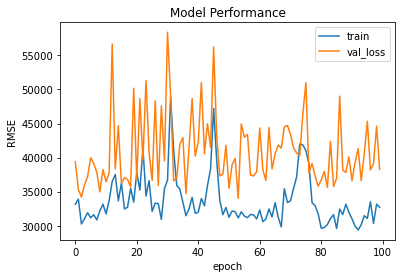

In [86]:
##plot the performance evaluation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

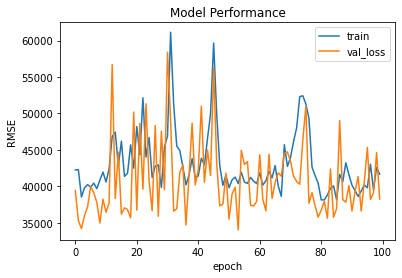

In [87]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show

In [ ]:
conda install -c conda-forge seaborn=0.12.2